In [67]:
"""
def cool_distance(p_a, p_b):

    dis = 0.0

    T_a = shpm.hberg.assemble(p_a[1])
    T_b = shpm.hberg.assemble(p_b[1])

    eigs_a = np.linalg.eigvals(T_a)
    eigs_b = np.linalg.eigvals(T_b)
    

    def split_eigs(eigs):

        eigs_real = []
        eigs_real_idxs = []
        
        eigs_comp = []
        eigs_comp_idxs = []

        for eig_idx, eig in enumerate(eigs):

            if np.imag(eig) == 0.0:                
                eigs_real.append(np.real(eig))
                eigs_real_idxs.append(eig_idx)
            else:
                eigs_comp.append(eig)
                eigs_comp_idxs.append(eig_idx)

        return eigs_real, eigs_real_idxs, eigs_comp, eigs_comp_idxs
    
    
    eigs_a_real, eigs_a_real_idx, eigs_a_comp, eigs_a_comp_idx = split_eigs(eigs_a)
    eigs_b_real, eigs_b_real_idx, eigs_b_comp, eigs_b_comp_idx = split_eigs(eigs_b)

    # match real eigenvalues:
    sort_perm_a_real = np.argsort(eigs_a_real)
    sort_perm_b_real = np.argsort(eigs_b_real)

    # match complex eigenvalues:
    row_idxs, col_idxs = np.abs(np.subtract.outer(eigs_a_comp, eigs_b_comp))

    

    perm_real = linear_sum_assignment()
    
    

    # match complex eigenvalues

    # 

    return
"""

'\ndef cool_distance(p_a, p_b):\n\n    dis = 0.0\n\n    T_a = shpm.hberg.assemble(p_a[1])\n    T_b = shpm.hberg.assemble(p_b[1])\n\n    eigs_a = np.linalg.eigvals(T_a)\n    eigs_b = np.linalg.eigvals(T_b)\n    \n\n    def split_eigs(eigs):\n\n        eigs_real = []\n        eigs_real_idxs = []\n        \n        eigs_comp = []\n        eigs_comp_idxs = []\n\n        for eig_idx, eig in enumerate(eigs):\n\n            if np.imag(eig) == 0.0:                \n                eigs_real.append(np.real(eig))\n                eigs_real_idxs.append(eig_idx)\n            else:\n                eigs_comp.append(eig)\n                eigs_comp_idxs.append(eig_idx)\n\n        return eigs_real, eigs_real_idxs, eigs_comp, eigs_comp_idxs\n    \n    \n    eigs_a_real, eigs_a_real_idx, eigs_a_comp, eigs_a_comp_idx = split_eigs(eigs_a)\n    eigs_b_real, eigs_b_real_idx, eigs_b_comp, eigs_b_comp_idx = split_eigs(eigs_b)\n\n    # match real eigenvalues:\n    sort_perm_a_real = np.argsort(eigs_a_real)\n  

In [ ]:
import numpy as np
import scipy as scp

from scipy.optimize import linear_sum_assignment

from shpm2 import SHPM

import matplotlib.pyplot as plt

from copy import deepcopy

from tqdm import tqdm

In [69]:
shpm = SHPM(10)

In [70]:
def eig_dis(H1, H2, n):

    eigs_1 = shpm.hberg.get_eigenspectrum(H1)
    eigs_2 = shpm.hberg.get_eigenspectrum(H2)

    eigs_12_cost = np.abs(np.subtract.outer(eigs_1, eigs_2))    

    row_inds_12, col_inds_12 = linear_sum_assignment(eigs_12_cost)    

    eig_dis_ab = np.sum(eigs_12_cost[row_inds_12, col_inds_12]) / n    

    return eig_dis_ab

def eig_dis_max(H1, H2, n):

    eigs_1 = shpm.hberg.get_eigenspectrum(H1)
    eigs_2 = shpm.hberg.get_eigenspectrum(H2)

    eigs_12_cost = np.abs(np.subtract.outer(eigs_1, eigs_2))    

    row_inds_12, col_inds_12 = linear_sum_assignment(eigs_12_cost)    

    eig_dis_ab_max = np.max(eigs_12_cost[row_inds_12, col_inds_12])

    return eig_dis_ab_max

In [71]:
# test
p_a = shpm.random_point()
p_ac = deepcopy(p_a)
p_a_ = shpm.mutate(p_a, 0.1)

print(f"eig_dis 1: {eig_dis(p_a[1], p_ac[1], 10)}")
print(f"eig_dis 2: {eig_dis(p_a[1], p_a_[1], 10)}")


eig_dis 1: 0.0
eig_dis 2: 0.07973114755360333


In [ ]:
def get_distances_dists(n: int, trials: int=1000):

    shpm = SHPM(n)    

    Q_diss_ab = []
    UT_diss_ab = []
    HD_diss_ab = []

    Q_diss_aa_ = []
    UT_diss_aa_ = []
    HD_diss_aa_ = []

    eig_diss_ab = []
    eig_diss_aa_ = []

    for trial_idx in tqdm(range(trials)):

        p_a = shpm.random_point()    
        p_b = shpm.random_point()        

        p_a_ = shpm.mutate(p_a, 0.1)        

        eig_dis_ab = eig_dis_max(p_a[1], p_b[1], n)
        eig_dis_aa_ = eig_dis_max(p_a[1], p_a_[1], n)

        eig_diss_ab.append(eig_dis_ab)
        eig_diss_aa_.append(eig_dis_aa_) 

        eigs_ab = np.linalg.eigvals(p_a[0].T @ p_b[0])
        eigs_aa_ = np.linalg.eigvals(p_a[0].T @ p_a_[0])

        Q_dis_ab = np.linalg.norm(np.angle(eigs_ab) / np.pi) / np.sqrt(n)
        Q_dis_aa_ = np.linalg.norm(np.angle(eigs_aa_) / np.pi) / np.sqrt(n)

        UT_dis_ab, HD_dis_ab = shpm.hberg.speciation_distance(p_a[1], p_b[1])    
        UT_dis_aa_, HD_dis_aa_ = shpm.hberg.speciation_distance(p_a[1], p_a_[1])    

        Q_diss_ab.append(Q_dis_ab)
        Q_diss_aa_.append(Q_dis_aa_)

        UT_diss_ab.append(UT_dis_ab)
        UT_diss_aa_.append(UT_dis_aa_)

        HD_diss_ab.append(HD_dis_ab)
        HD_diss_aa_.append(HD_dis_aa_)



    return Q_diss_ab, UT_diss_ab, HD_diss_ab, Q_diss_aa_, UT_diss_aa_, HD_diss_aa_, eig_diss_ab, eig_diss_aa_

In [73]:
Q_diss_ab, UT_diss_ab, HD_diss_ab,Q_diss_aa_, UT_diss_aa_, HD_diss_aa_, eig_diss_ab, eig_diss_aa_ = get_distances_dists(10, 5000)

In [74]:
# _, _, _, _, _, _, eig_diss_ab_2, eig_diss_aa__2 = get_distances_dists(2, 5000)
_, _, _, _, _, _, eig_diss_ab_4, eig_diss_aa__4 = get_distances_dists(4, 5000)
_, _, _, _, _, _, eig_diss_ab_8, eig_diss_aa__8 = get_distances_dists(8, 5000)
_, _, _, _, _, _, eig_diss_ab_16, eig_diss_aa__16 = get_distances_dists(16, 5000)
_, _, _, _, _, _, eig_diss_ab_32, eig_diss_aa__32 = get_distances_dists(32, 5000)
_, _, _, _, _, _, eig_diss_ab_64, eig_diss_aa__64 = get_distances_dists(64, 5000)

In [95]:
_, _, _, _, _, _, eig_diss_ab_128, eig_diss_aa__128 = get_distances_dists(128, 5000)

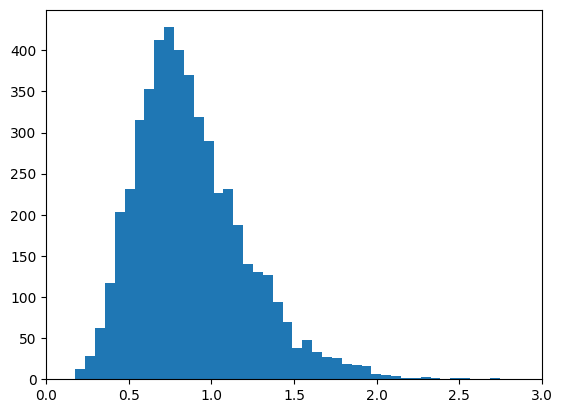

In [99]:
plt.hist(eig_diss_aa__64, bins=50)
plt.xlim((0.0, 3.0))
plt.show()

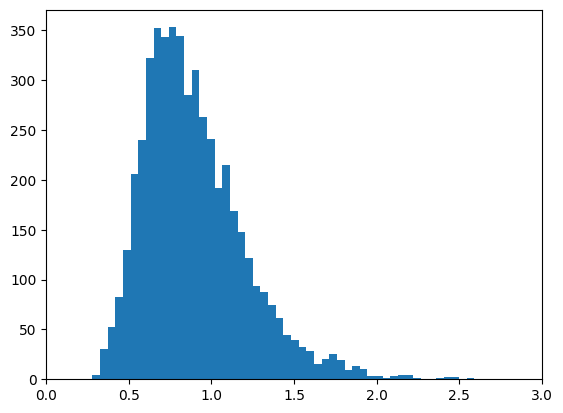

In [100]:
plt.hist(eig_diss_aa__128, bins=50)
plt.xlim((0.0, 3.0))
plt.show()

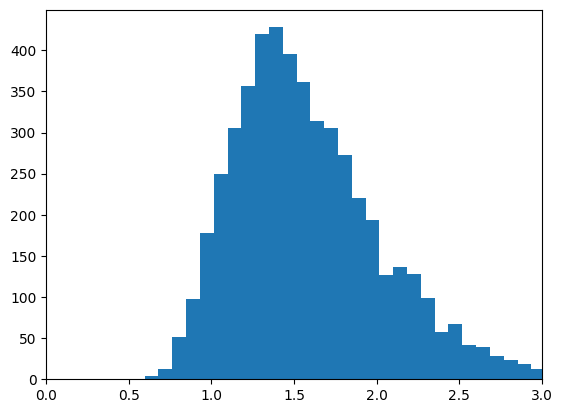

In [ ]:
plt.hist(eig_diss_ab_64, bins=50)
plt.xlim((0.0, 3.0))
plt.show()

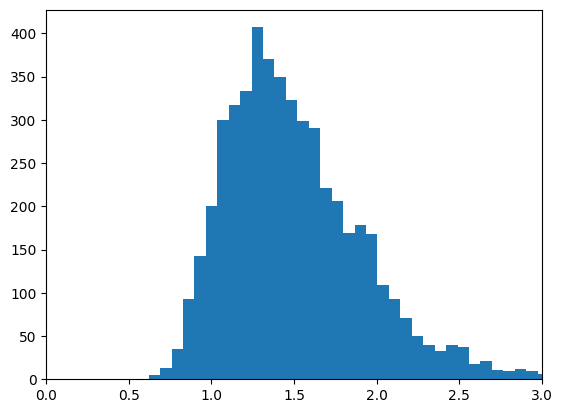

In [97]:
plt.hist(eig_diss_ab_128, bins=50)
plt.xlim((0.0, 3.0))
plt.show()

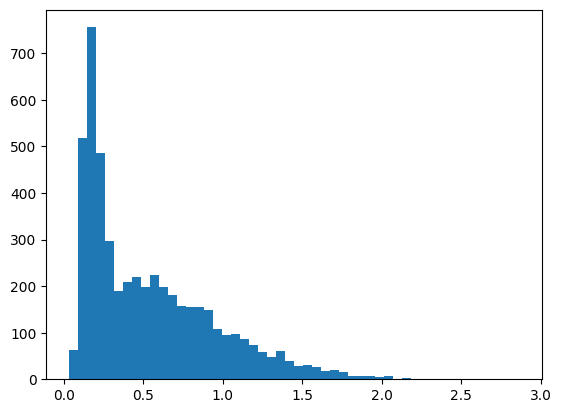

In [76]:
plt.hist(eig_diss_aa_, bins=50)
# plt.xlim((0.0, 1.0))
plt.show()

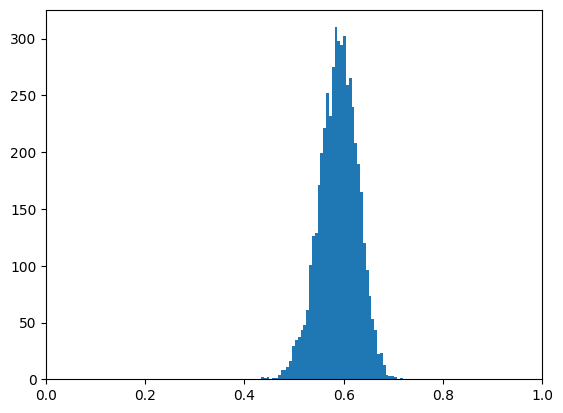

In [77]:
plt.hist(Q_diss_ab, bins=50)
plt.xlim((0.0, 1.0))
plt.show()

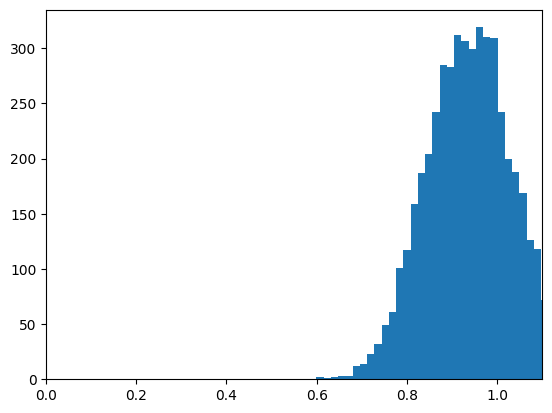

In [78]:
plt.hist(UT_diss_ab, bins=50)
plt.xlim((0.0, 1.1))
plt.show()

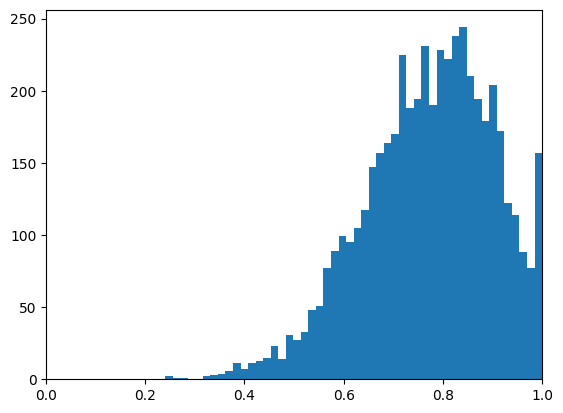

In [79]:
plt.hist(HD_diss_ab, bins=50)
plt.xlim((0.0, 1.0))
plt.show()

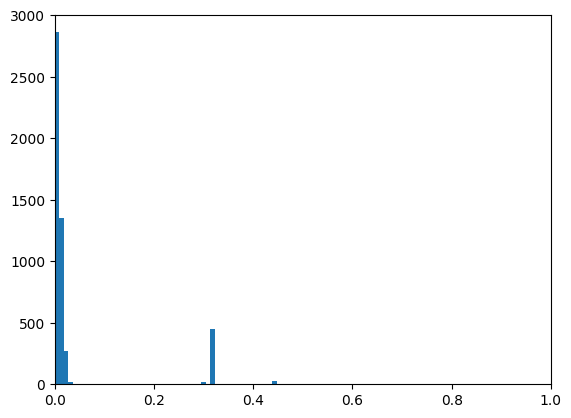

In [80]:
plt.hist(Q_diss_aa_, bins=50)
plt.xlim((0.0, 1.0))
plt.show()

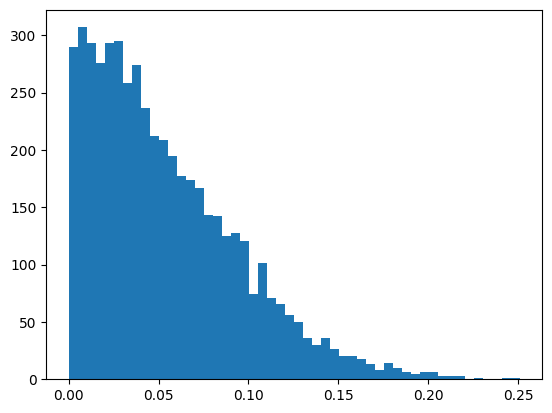

In [81]:
# plt.hist(100 * np.array(UT_diss_aa_), bins=50)
plt.hist(UT_diss_aa_, bins=50)
# plt.xlim((0.0, 1.0))
plt.show()

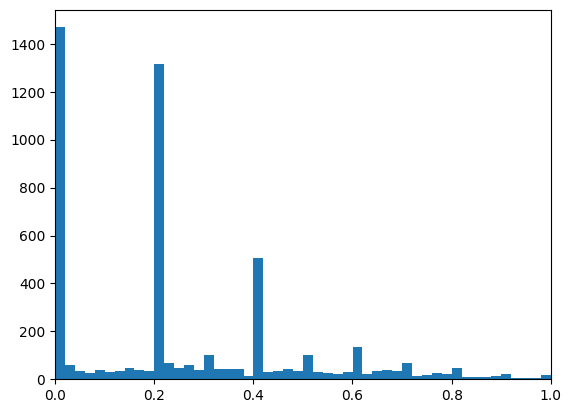

In [82]:
plt.hist(HD_diss_aa_, bins=50)
plt.xlim((0.0, 1.0))
plt.show()